In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cs9856-spotify-regression-problem-2024/CS98XRegressionTest.csv
/kaggle/input/cs9856-spotify-regression-problem-2024/CS98XRegressionTrain.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
train_df= pd.read_csv("/kaggle/input/cs9856-spotify-regression-problem-2024/CS98XRegressionTrain.csv")
train_df.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [3]:
test_df= pd.read_csv("/kaggle/input/cs9856-spotify-regression-problem-2024/CS98XRegressionTest.csv")
test_df.shape , train_df.shape

((114, 14), (453, 15))

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [5]:
train_df.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


In [6]:
train_df.drop_duplicates(keep= False).shape

(453, 15)

In [7]:
train_df=train_df.dropna()
train_df.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
5,6,Grenade,Bruno Mars,pop,2010,110,56,71,-7,12,23,223,15,6,74


In [8]:
train_df.columns

Index(['Id', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce',
       'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [9]:
# Drop the categorical Varibles and year column
columns= ['Id',
    #'title', 'artist', 'top genre', 'year', 
       'bpm', 'nrgy', 
    'dnce','dB', 'live', 
    'val', 'dur', 
    'acous', 'spch', 'pop']

In [10]:
# dropping columns not needed
train_df= train_df[columns]
train_df.shape

(438, 11)

<Axes: >

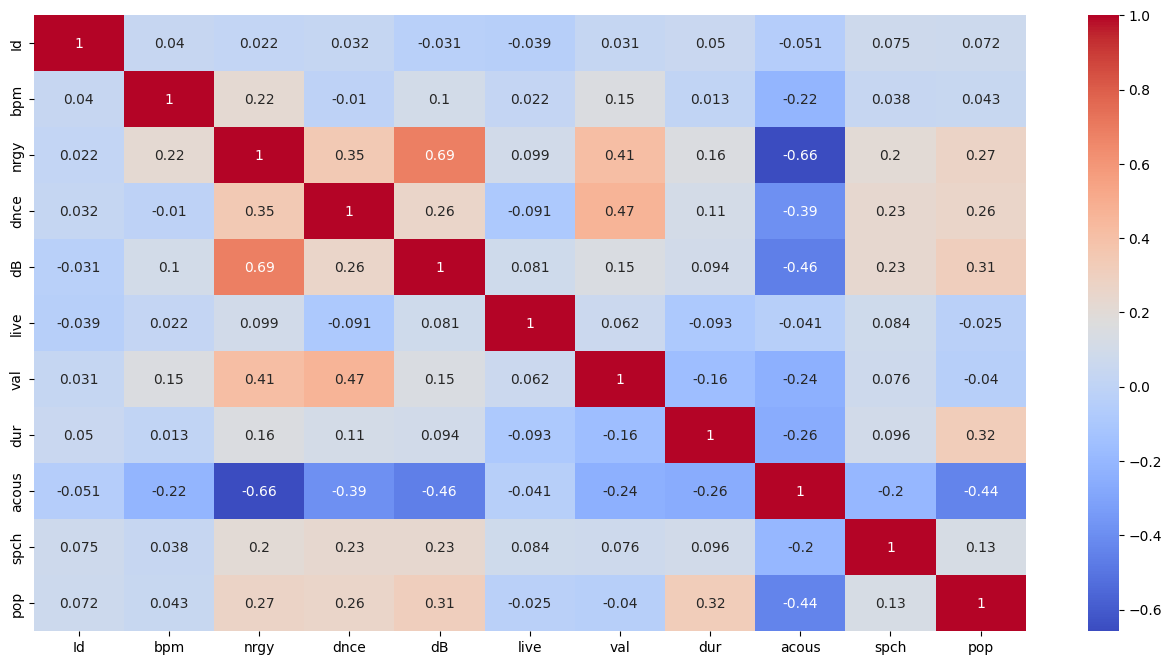

In [11]:
# Plotting correlations on a heatmap
corl=train_df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corl,cmap="coolwarm",annot=True)

In [12]:
# from the Correlation table we shall drop this columns that are highly correlated 
# and some columns which are not related to the popularity of the Music
columns= [#'Id',#'title', 'artist', 'top genre', 'year', 
       'bpm', 
    #'nrgy', 
    'dnce','dB', 
    #'live', 
    'val', 'dur', 
    'acous', 'spch', 'pop']

In [13]:
# dropping columns not needed
train_df= train_df[columns]
train_df.shape

(438, 8)

[Text(0.5, 1.0, 'pop')]

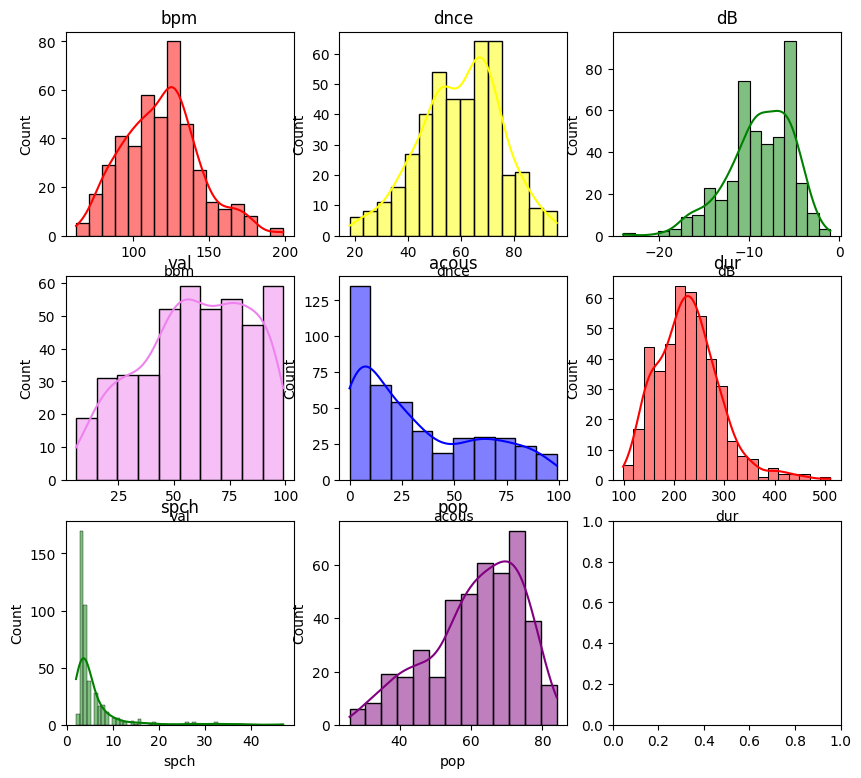

In [14]:
# kde of Features selected
fig, ax = plt.subplots(3,3, figsize=(10,9))
sns.histplot(x=train_df["bpm"], ax=ax[0][0], color="red", kde=True).set(title='bpm')
sns.histplot(x=train_df["dnce"], ax=ax[0][1], color="yellow", kde=True).set(title='dnce')
sns.histplot(x=train_df["dB"], ax=ax[0][2], color="green", kde=True).set(title='dB')
sns.histplot(x=train_df["val"], ax=ax[1][0], color="violet", kde=True).set(title='val')
sns.histplot(x=train_df["acous"], ax=ax[1][1], color="blue", kde=True).set(title='acous')
sns.histplot(x=train_df["dur"], ax=ax[1][2], color="red", kde=True).set(title='dur')
sns.histplot(x=train_df["spch"], ax=ax[2][0], color="green", kde=True).set(title='spch')
sns.histplot(x=train_df["pop"], ax=ax[2][1], color="purple", kde=True).set(title='pop')

In [15]:
# Feature selection
X= train_df[['bpm', 'dnce','dB', 'val', 'dur', 'acous', 'spch']]
y= train_df['pop']

In [16]:
# Splitting the data into Train and Test Data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.26, random_state=42)
print(X_train.shape) 
print(X_test.shape) 

(324, 7)
(114, 7)


In [17]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

## SELECT FROM THE MODEL

In [18]:
# LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)
lin_mse = mean_squared_error(y_test, pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

10.555585986654417

In [19]:
# Lasso Regression
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.5)
lassoreg.fit(X_train, y_train)
predlasso = lassoreg.predict(X_test)
lasso_mse = mean_squared_error(y_test, predlasso)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

10.5704213757467

In [20]:
#  Ridge Regression
from sklearn.linear_model import Ridge
Ridgereg =Ridge(alpha=0.5)
Ridgereg.fit(X_train, y_train)
predRidge = Ridgereg.predict(X_test)
Ridge_mse = mean_squared_error(y_test, predRidge)
Ridge_rmse = np.sqrt(Ridge_mse)
Ridge_rmse

10.554937100684404

In [21]:
# RandomForest Regression
from sklearn.ensemble import RandomForestRegressor 
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
predforest = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, predforest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

10.214729260222667

In [22]:
# KNeighborsRegression
from sklearn.neighbors import KNeighborsRegressor
Knnreg = KNeighborsRegressor()
Knnreg.fit(X_train, y_train)
predKnn = Knnreg.predict(X_test)
Knn_mse = mean_squared_error(y_test, predKnn)
Knn_rmse = np.sqrt(Knn_mse)
Knn_rmse

10.609727413533003

## Using the RandomForest Regression Model

In [23]:
# Predicting with RandomForest Regression
from sklearn.ensemble import RandomForestRegressor 
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
submission_pred = forest_model.predict(X_test)

In [24]:
test_df=pd.read_csv("/kaggle/input/cs9856-spotify-regression-problem-2024/CS98XRegressionTest.csv")
test_ids=test_df["Id"]

In [25]:
print(submission_pred.shape) 
print(test_df.shape) 

(114,)
(114, 14)


In [26]:
#popularity
df= pd.DataFrame({"Id":test_ids.values,"pop":submission_pred})
df.to_csv("submission.csv",index=False)
